Mounting Drive

In [1]:

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


In [2]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
!pip install albumentations

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]. Add rotation range and download dataset



In [29]:
from Transform_utils import transforme_album
from transforme_album  import Data
data = Data()

trainset = data.getTrainDataSet(train=True)
trainset1 = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


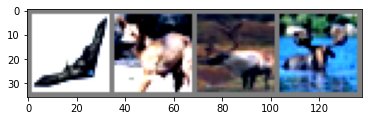

In [6]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [7]:
from Model_ import resnet
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [9]:
import torch
from tqdm import tqdm
import traine
import teste
test_acc = []
train_acc = []
for epoch in range(50):  # loop over the dataset multiple times
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.6114695072174072 Batch_id=390 Accuracy=37.50: 100%|██████████| 391/391 [01:11<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 42.13 %
lr=  0.1


Epoch= 1 Loss=1.4387242794036865 Batch_id=390 Accuracy=48.75: 100%|██████████| 391/391 [01:10<00:00,  6.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 52.38 %
lr=  0.1


Epoch= 2 Loss=1.033722162246704 Batch_id=390 Accuracy=70.00: 100%|██████████| 391/391 [01:13<00:00,  6.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 63.77 %
lr=  0.1


Epoch= 3 Loss=0.9281638860702515 Batch_id=390 Accuracy=71.25: 100%|██████████| 391/391 [01:13<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 65.24 %
lr=  0.1


Epoch= 4 Loss=0.593417763710022 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [01:12<00:00,  6.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.38 %
lr=  0.1


Epoch= 5 Loss=0.5694617033004761 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [01:11<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.31 %
lr=  0.1


Epoch= 6 Loss=0.6023677587509155 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [01:13<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.32 %
lr=  0.1


Epoch= 7 Loss=0.6835365295410156 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [01:13<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.50 %
lr=  0.1


Epoch= 8 Loss=0.5526915788650513 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [01:13<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.48 %
lr=  0.1


Epoch= 9 Loss=0.4661181569099426 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [01:13<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.37 %
lr=  0.1


Epoch= 10 Loss=0.3782627582550049 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:12<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.70 %
lr=  0.1


Epoch= 11 Loss=0.4264274537563324 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [01:13<00:00,  6.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.83 %
lr=  0.1


Epoch= 12 Loss=0.32046669721603394 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:12<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.15 %
lr=  0.1


Epoch= 13 Loss=0.2780342698097229 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:12<00:00,  6.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.86 %
lr=  0.1


Epoch= 14 Loss=0.18945454061031342 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:12<00:00,  6.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.81 %
lr=  0.1


Epoch= 15 Loss=0.2912276089191437 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:12<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.39 %
lr=  0.1


Epoch= 16 Loss=0.16311366856098175 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:12<00:00,  6.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.96 %
lr=  0.1


Epoch= 17 Loss=0.2079046219587326 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.32 %
lr=  0.1


Epoch= 18 Loss=0.22049686312675476 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:11<00:00,  6.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.22 %
lr=  0.1


Epoch= 19 Loss=0.24632664024829865 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.08 %
lr=  0.05


Epoch= 20 Loss=0.03154897689819336 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:12<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.49 %
lr=  0.05


Epoch= 21 Loss=0.049679946154356 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:12<00:00,  6.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.32 %
lr=  0.05


Epoch= 22 Loss=0.012737196870148182 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [01:12<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.59 %
lr=  0.05


Epoch= 23 Loss=0.0677657276391983 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.48 %
lr=  0.05


Epoch= 24 Loss=0.011885243467986584 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.01 %
lr=  0.05


Epoch= 25 Loss=0.04031486436724663 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:12<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.18 %
lr=  0.05


Epoch= 26 Loss=0.04166553169488907 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.21 %
lr=  0.05


Epoch= 27 Loss=0.02020794153213501 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.54 %
lr=  0.05


Epoch= 28 Loss=0.03230848163366318 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.75 %
lr=  0.05


Epoch= 29 Loss=0.057937394827604294 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.98 %
lr=  0.025


Epoch= 30 Loss=0.004532599356025457 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:11<00:00,  6.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.11 %
lr=  0.025


Epoch= 31 Loss=0.002286237431690097 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.03 %
lr=  0.025


Epoch= 32 Loss=0.0018784046405926347 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.31 %
lr=  0.025


Epoch= 33 Loss=0.008095121011137962 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.29 %
lr=  0.025


Epoch= 34 Loss=0.020454252138733864 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.50 %
lr=  0.025


Epoch= 35 Loss=0.011580383405089378 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.51 %
lr=  0.025


Epoch= 36 Loss=0.006667601875960827 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.37 %
lr=  0.025


Epoch= 37 Loss=0.015417891554534435 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.37 %
lr=  0.025


Epoch= 38 Loss=0.000529682612977922 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.50 %
lr=  0.025


Epoch= 39 Loss=0.0005515098455362022 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.17 %
lr=  0.0125


Epoch= 40 Loss=0.0020502805709838867 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.49 %
lr=  0.0125


Epoch= 41 Loss=0.0018566728103905916 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.55 %
lr=  0.0125


Epoch= 42 Loss=0.005026102066040039 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.78 %
lr=  0.0125


Epoch= 43 Loss=0.0020666359923779964 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:11<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.61 %
lr=  0.0125


Epoch= 44 Loss=0.0008006691932678223 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.56 %
lr=  0.0125


Epoch= 45 Loss=0.0010202288394793868 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.83 %
lr=  0.0125


Epoch= 46 Loss=0.0013663232093676925 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.59 %
lr=  0.0125


Epoch= 47 Loss=0.001244878745637834 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.73 %
lr=  0.0125


Epoch= 48 Loss=0.0006951451068744063 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.59 %
lr=  0.0125


Epoch= 49 Loss=0.00041005612001754344 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.02it/s]
100%|██████████| 79/79 [00:03<00:00, 22.11it/s]

Accuracy of the network on the 10000 test images: 88.63 %
Finished Training


Text(0, 0.5, 'Accuracy')

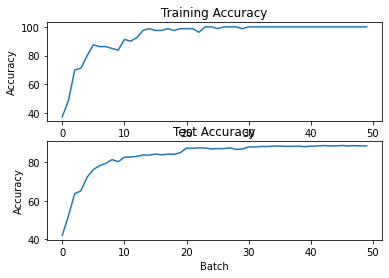

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc) 
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   ship truck   car  frog


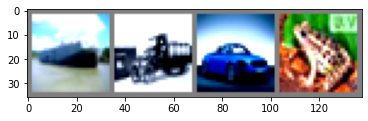

In [13]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship truck   car  frog


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [16]:
teste.test_categorywise(net, device, testloader, classes)

100%|██████████| 79/79 [00:03<00:00, 22.31it/s]

Accuracy of plane : 90.62 %
Accuracy of   car : 91.18 %
Accuracy of  bird : 87.88 %
Accuracy of   cat : 86.67 %
Accuracy of  deer : 94.44 %
Accuracy of   dog : 69.23 %
Accuracy of  frog : 94.74 %
Accuracy of horse : 92.50 %
Accuracy of  ship : 100.00 %
Accuracy of truck : 86.36 %


In [17]:
# get the image from the dataloader
testset =  data.getTrainDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


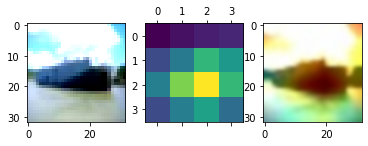

In [18]:
import gradcame
img,_ = next(it)
gradcame.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


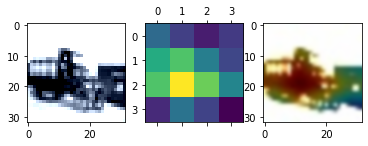

In [19]:
img,_ = next(it)
gradcame.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


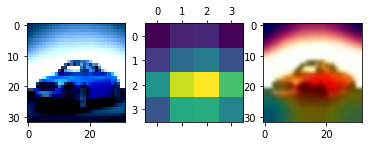

In [20]:
img,_ = next(it)
gradcame.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


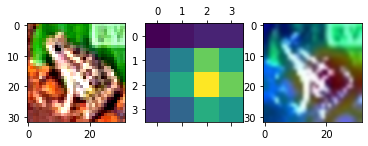

In [21]:
img,_ = next(it)
gradcame.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat


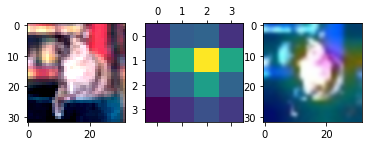

In [27]:
img,_ = next(it)
gradcame.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog


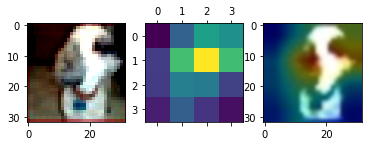

In [26]:
img,_ = next(it)
gradcame.gradcamof(net, img, classes)